<a href="https://colab.research.google.com/github/jainei27/Redes-Neuronales/blob/main/ClaseAnalisis_26_04_2025_Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5496 - loss: 0.8566 - val_accuracy: 0.8000 - val_loss: 0.7039
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8205 - loss: 0.6659 - val_accuracy: 0.8725 - val_loss: 0.5816
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8785 - loss: 0.5478 - val_accuracy: 0.8825 - val_loss: 0.4978
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8743 - loss: 0.4783 - val_accuracy: 0.8800 - val_loss: 0.4398
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8951 - loss: 0.4124 - val_accuracy: 0.8750 - val_loss: 0.3987
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8816 - loss: 0.3846 - val_accuracy: 0.8775 - val_loss: 0.3740
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8918 - loss: 0.3584 - val_accuracy: 0.8750 - val_loss: 0.3530
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8803 - loss: 0.3497 - val_accuracy: 0.8750 - val_loss:

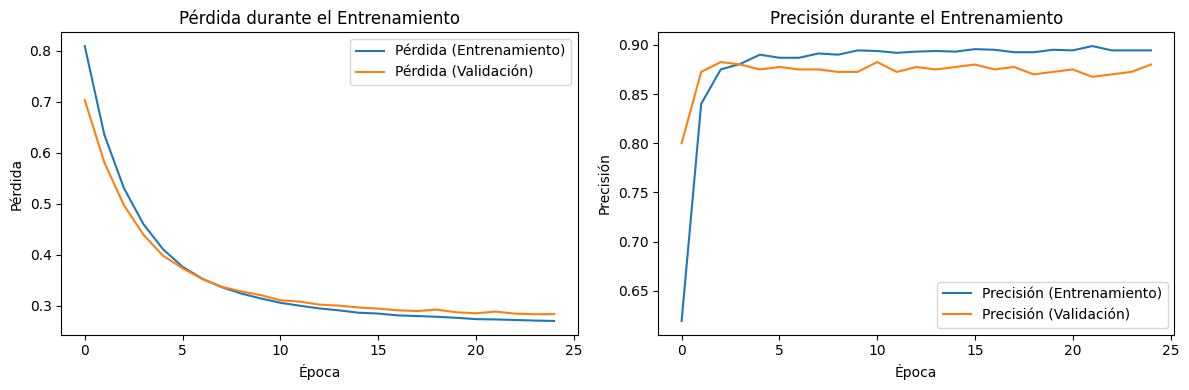

In [7]:
# 1. Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# 2. Generar datos sintéticos
np.random.seed(42)  # Semilla para reproducibilidad
n_samples = 2500    # 2500 pacientes
n_features = 10     # 10 características clínicas

# Características simuladas (normalizadas)
X = np.random.randn(n_samples, n_features)

# Pesos para simular la importancia de las características
weights = np.random.randn(n_features)

# Generar etiquetas (0: sano, 1: enfermedad cardíaca) con algo de ruido
y = (np.dot(X, weights) + np.random.randn(n_samples) * 0.5 > 0).astype(int)

# 3. Dividir los datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Crear el modelo
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta
model.add(Dense(1, activation='sigmoid'))  # Capa de salida

# 5. Compilar el modelo
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 6. Mostrar resumen del modelo
model.summary()

# 7. Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 8. Evaluar el modelo en datos de prueba
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nPrecisión en el conjunto de prueba: {accuracy:.4f}")
print("\nMatriz de confusión:")
print(conf_matrix)

# 9. Visualizar pérdida y precisión durante el entrenamiento
plt.figure(figsize=(12, 4))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (Entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (Validación)')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (Entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (Validación)')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()
